In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math
import statistics
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy import ndimage
import seaborn as sns 
import pandas as pd

# Need to add P1 and P2 to function.

In [2]:
def gauss2D(x, m, C):
    k = 2
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = np.sqrt(((2 * np.pi)**k) * dC)
    return num/den

In [3]:
def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 7, nx)
    y = np.linspace(-5, 7, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

In [4]:
def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i,j] = num / den
    return X, Y, Z

In [5]:
U1 = np.random.randn(200,2)
U2 = np.random.randn(200,2)

In [6]:
nx, ny = 50, 40
m1 = np.array([0,3], np.float32)
C1 = np.array([[2,1], [1,2]], np.float32)
m2 = np.array([3,2.5], np.float32)
C2 = np.array([[2,1], [1,2]], np.float32)
P1, P2 = 0.5, 0.5

A1 = np.linalg.cholesky(C1)
X1 = U1 @ A1.T + m1

A2 = np.linalg.cholesky(C2)
X2 = U2 @ A2.T + m2

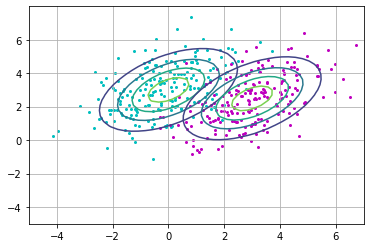

In [7]:
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.scatter(X1[:,0], X1[:,1], c="c", s=4)
plt.scatter(X2[:,0], X2[:,1], c="m", s=4)
plt.grid()
plt.show()

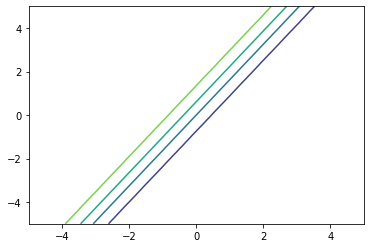

In [8]:
Xp, Yp, Zp =posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.show()

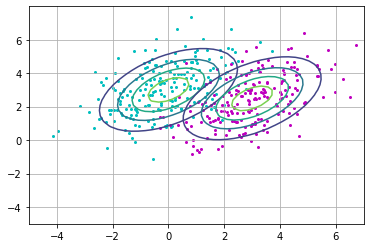

In [9]:
nx, ny = 50, 40
m1 = np.array([0,3], np.float32)
C1 = np.array([[2,1], [1,2]], np.float32)
m2 = np.array([3,2.5], np.float32)
C2 = np.array([[2,1], [1,2]], np.float32)
P1, P2 = 0.7, 0.3

A1 = np.linalg.cholesky(C1)
X1 = U1 @ A1.T + m1

A2 = np.linalg.cholesky(C2)
X2 = U2 @ A2.T + m2

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.scatter(X1[:,0], X1[:,1], c="c", s=4)
plt.scatter(X2[:,0], X2[:,1], c="m", s=4)
plt.grid()
plt.show()

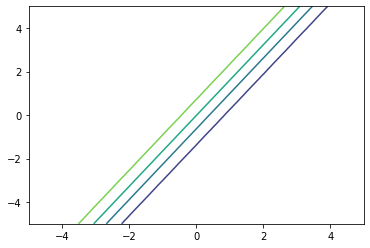

In [10]:
Xp, Yp, Zp =posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.show()

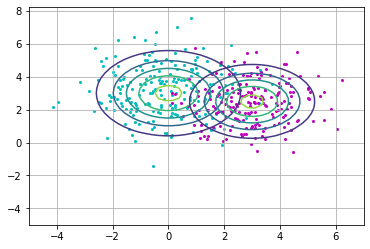

In [11]:
nx, ny = 50, 40
m1 = np.array([0,3], np.float32)
C1 = np.array([[2,0], [0,2]], np.float32)
m2 = np.array([3,2.5], np.float32)
C2 = np.array([[1.5,0], [0,1.5]], np.float32)
P1, P2 = 0.5, 0.5

A1 = np.linalg.cholesky(C1)
X1 = U1 @ A1.T + m1

A2 = np.linalg.cholesky(C2)
X2 = U2 @ A2.T + m2

Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.scatter(X1[:,0], X1[:,1], c="c", s=4)
plt.scatter(X2[:,0], X2[:,1], c="m", s=4)
plt.grid()
plt.show()

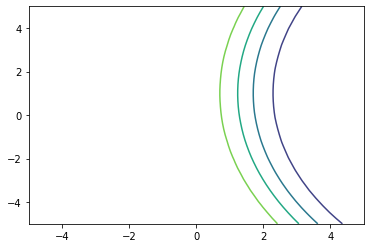

In [12]:
Xp, Yp, Zp =posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.show()

In [16]:
nx, ny = 50, 40
m1 = np.array([2.4,3.2], np.float32)
C1 = np.array([[2,-1], [-1,2]], np.float32)
m2 = np.array([1.2,0.2], np.float32)
C2 = np.array([[2,0], [0,4]], np.float32)
P1, P2 = 0.5, 0.5

A1 = np.linalg.cholesky(C1)
X1 = U1 @ A1.T + m1

A2 = np.linalg.cholesky(C2)
X2 = U2 @ A2.T + m2

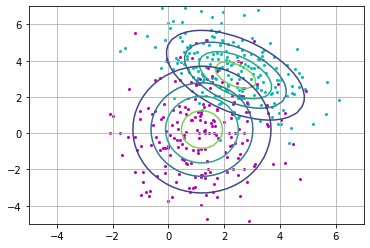

In [17]:
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.scatter(X1[:,0], X1[:,1], c="c", s=4)
plt.scatter(X2[:,0], X2[:,1], c="m", s=4)
plt.grid()
plt.show()

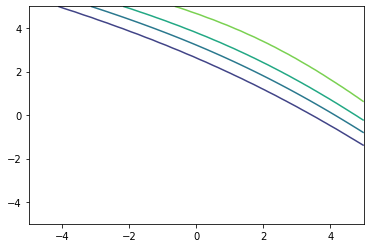

In [18]:
Xp, Yp, Zp =posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.show()

In [19]:
nx, ny = 50, 40
m1 = np.array([2.4,3.2], np.float32)
C1 = np.array([[2,0], [0,2]], np.float32)
m2 = np.array([1.2,0.2], np.float32)
C2 = np.array([[2,0], [0,4]], np.float32)
P1, P2 = 0.5, 0.5

A1 = np.linalg.cholesky(C1)
X1 = U1 @ A1.T + m1

A2 = np.linalg.cholesky(C2)
X2 = U2 @ A2.T + m2

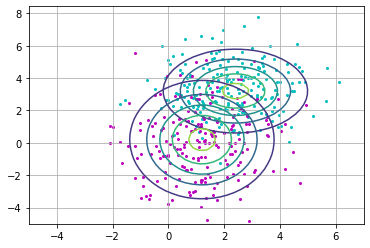

In [20]:
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.scatter(X1[:,0], X1[:,1], c="c", s=4)
plt.scatter(X2[:,0], X2[:,1], c="m", s=4)
plt.grid()
plt.show()

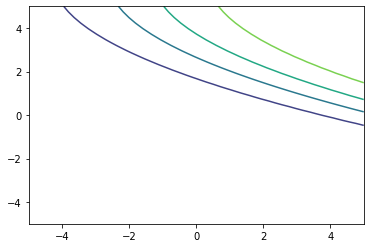

In [21]:
Xp, Yp, Zp =posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.show()

In [30]:
nx, ny = 50, 40
m1 = np.array([0,0], np.float32)
C1 = np.array([[2,1], [1,2]], np.float32)
m2 = np.array([0,4], np.float32)
C2 = np.array([[2,1], [1,2]], np.float32)
P1, P2 = 0.5, 0.5

A1 = np.linalg.cholesky(C1)
X1 = U1 @ A1.T + m1

A2 = np.linalg.cholesky(C2)
X2 = U2 @ A2.T + m2

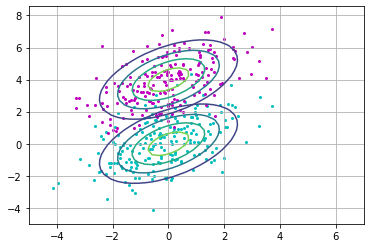

In [31]:
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.scatter(X1[:,0], X1[:,1], c="c", s=4)
plt.scatter(X2[:,0], X2[:,1], c="m", s=4)
plt.grid()
plt.show()

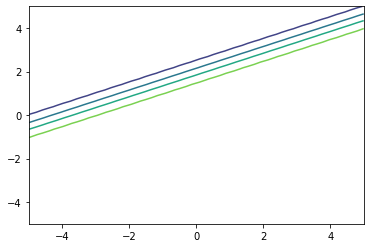

In [32]:
Xp, Yp, Zp =posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.show()

In [33]:
nx, ny = 50, 40
m1 = np.array([0,3], np.float32)
C1 = np.array([[2,-1], [-1,2]], np.float32)
m2 = np.array([3,3], np.float32)
C2 = np.array([[2,-1], [-1,2]], np.float32)
P1, P2 = 0.5, 0.5

A1 = np.linalg.cholesky(C1)
X1 = U1 @ A1.T + m1

A2 = np.linalg.cholesky(C2)
X2 = U2 @ A2.T + m2

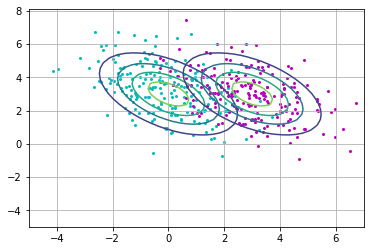

In [34]:
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.scatter(X1[:,0], X1[:,1], c="c", s=4)
plt.scatter(X2[:,0], X2[:,1], c="m", s=4)
plt.grid()
plt.show()

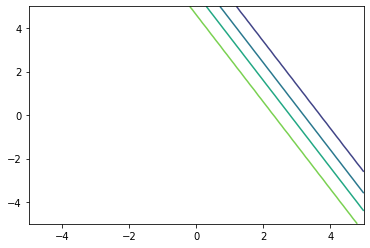

In [35]:
Xp, Yp, Zp =posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.contour(Xp, Yp, Zp, 5)
plt.show()